#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 7: Regularización de modelos de regresión Alumno: Ibarra Ramírez Sergio </font>

Vamos a importar la data y separar en train y test 

In [2]:
import pandas as pd

tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")

y = tabla["E"]
X = tabla.drop(["E"],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,)

#### Vamos a importar el modelo linear_model y definir el modelo Lasso (con su alpha)

In [1]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso

Lasso(alpha=0.1)

Entenamos el modelo Lasso 

In [3]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

Revisamos como fueron los coeficientes del modelo Lasso 

In [5]:
caracteristicas = X.columns
coef_dict = {}

for coef,caracteristica in zip(lasso.coef_,caracteristicas):
  coef_dict[caracteristica] = coef

print(coef_dict)

{'A': -0.00467702188036741, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'F': 0.0}


Notar como Lasso 'apaga' los pesos de las variables menos importantes' 

In [6]:
lasso.coef_

array([-0.00467702,  0.        ,  0.        ,  0.        ,  0.        ])

Revismos el error con el modelo Lasso 

In [10]:
from sklearn.metrics import mean_squared_error

y_pred_lasso =  lasso.predict(X_test)
RMSE_lasso = mean_squared_error(y_test,y_pred_lasso,squared=False)
print(RMSE_lasso)

0.06198478611969136


In [11]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred_lasso =  lasso.predict(X_test)
# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_lasso = mean_absolute_percentage_error(y_test,y_pred_lasso)
print("MAPE:", mape_lasso)

MAPE: 0.05613546246821973


Vamos a hacer un loop para diferentes valores de alpha 

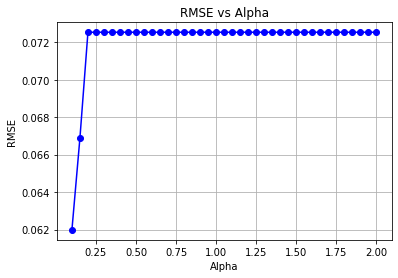

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas_lasso = np.arange(0.1, 2.05, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
alpha_lasso_values = []
rmse_values_lasso = []

# Iterate through each alpha value
for alpha in alphas_lasso:
    # Create and fit the Lasso model
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_lasso = lasso.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
    
    # Store the alpha value and corresponding RMSE
    alpha_lasso_values.append(alpha)
    rmse_values_lasso.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(alpha_lasso_values, rmse_values_lasso, 'bo-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.show()


#### Vamos a importar el modelo linear_model y definir el modelo Ridge (con su alpha)

In [7]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge

Ridge(alpha=0.1)

Entrenamos el modleo Ridge 

In [8]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

Revisamos como fueron los coeficientes del modelo Ridge 

In [9]:
caracteristicas = X.columns
coef_dict = {}

for coef,caracteristica in zip(ridge.coef_,caracteristicas):
  coef_dict[caracteristica] = coef

print(coef_dict)

{'A': 0.00033844369297661843, 'B': -0.0655089781656187, 'C': 0.003635466869717104, 'D': 0.4642372669223339, 'F': 0.09324052794257306}


Vamos a hacer un loop para diferentes valores de alhpa en para Ridge 

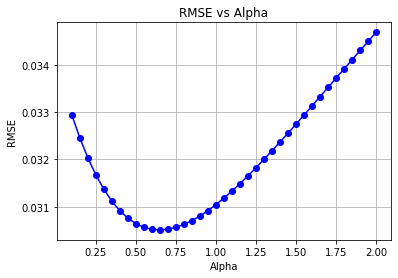

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas_ridge = np.arange(0.1, 2.05, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
alpha_ridge_values = []
rmse_values_ridge = []

# Iterate through each alpha value
for alpha in alphas_ridge:
    # Create and fit the Lasso model
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_ridge = ridge.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
    
    # Store the alpha value and corresponding RMSE
    alpha_ridge_values.append(alpha)
    rmse_values_ridge.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(alpha_ridge_values, rmse_values_ridge, 'bo-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.show()

#### Vamos a importar el modelo linear_model y definir el modelo Net-Elastic (con su alpha y con su r)

Definiendo y entrenando el modelo Net-elastic 

In [21]:
modelo_elastic = linear_model.ElasticNet(alpha=0.01,l1_ratio=0.5)

modelo_elastic.fit(X_train,y_train)

ElasticNet(alpha=0.01)

Para averiguar los coeficientes delo modelo Net-elastic 

In [22]:
cacteristicas = X.columns
coef_dict = {}

for coef,caracteristica in zip(modelo_elastic.coef_,caracteristicas):
  coef_dict[caracteristica] = coef

print(coef_dict)

{'A': -0.004786013814330012, 'B': -0.0, 'C': 0.0, 'D': 0.20019088680188962, 'F': 0.0}


Vamos a hace run loop para diferentes valores de alpha en NET-ELASTIC

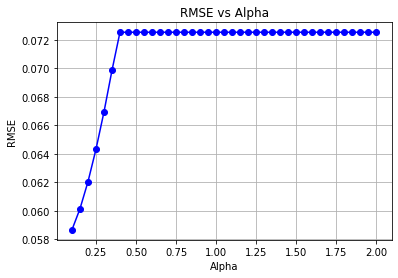

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
alphas_net = np.arange(0.1, 2.05, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
alpha_net_values = []
rmse_values_net = []

# Iterate through each alpha value
for alpha in alphas_net:
    # Create and fit the Lasso model
    net = linear_model.ElasticNet(alpha=alpha,l1_ratio=0.5)
    net.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_net = net.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred_net, squared=False)
    
    # Store the alpha value and corresponding RMSE
    alpha_net_values.append(alpha)
    rmse_values_net.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(alpha_net_values, rmse_values_net, 'bo-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)
plt.show()

Vamos a hace run loop para diferentes valores de li_ratio  en NET-ELASTIC

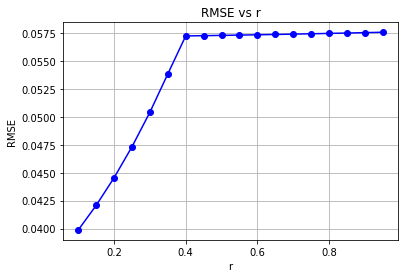

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Define the range of alpha values
li_ratios = np.arange(0.1, 1, 0.05)

# Initialize lists to store alpha values and corresponding RMSEs
l1_ratio_net_values = []
rmse_values_net_ratio = []

# Iterate through each alpha value
for li in li_ratios:
    # Create and fit the Lasso model
    net_l1_ratio = linear_model.ElasticNet(alpha=0.025,l1_ratio=li)
    net_l1_ratio.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_net_l1_ratio = net_l1_ratio.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred_net_l1_ratio, squared=False)
    
    # Store the alpha value and corresponding RMSE
    l1_ratio_net_values.append(li)
    rmse_values_net_ratio.append(rmse)
    
    # Print the RMSE for each alpha value (optional)
    #print(f"Alpha: {alpha:.2f}, RMSE: {rmse:.2f}")

# Plotting RMSE vs alpha
plt.plot(l1_ratio_net_values, rmse_values_net_ratio, 'bo-')
plt.xlabel('r')
plt.ylabel('RMSE')
plt.title('RMSE vs r')
plt.grid(True)
plt.show()